# ELECTION DATA PROJECT
## Analyzing the recent 2012 US Election Data

1) Utilizing two datasets (a) Results of political polls. (b) Aggregated poll data

Questions from FIRST dataset

1) Candidate being polled and their part affiliation?

2) Poll Results favor Romney or Obama?

3) Effect of undecided voters on polls?

4) Accounting for undecided voters?

5) Did voter sentiment change over time?

6) After debates, do polls change?

In [1]:
# Standard import libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Standard visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#taking care of int division
from __future__ import division

Source for polls: HuffPost Pollster http://elections.huffingtonpost.com/pollster

Using module "requests" to import data from web. 

Refresher: http://docs.python-requests.org/en/latest/

Using StringIO to work with CSV data from Huffpost

Refresher: https://pymotw.com/2/StringIO/


In [2]:
#Getting data from the web(HTTP capabilities)
import requests

#Getting data from csv file using StringIO.
#DataFrame requires a .read() method
from StringIO import StringIO

In [3]:
#URL for Huffpost pollster
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

#Using requests to get info in text format
source = requests.get(url).text

#Using StringIO to avoid an IO error with pandas
poll_data = StringIO(source)


In [4]:
#Initializing poll dataframe in pandas
poll_df = pd.read_csv(poll_data)

poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


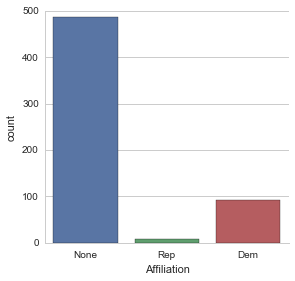

In [6]:
# Checking Affiliation of the polls conducted
sns.factorplot('Affiliation',data=poll_df,kind='count')
#CONCLUSION: Most of them are unaffiliated, which is a good sign.
#CONCLUSION: Democratic affiliated polls > Republican affiliated polls

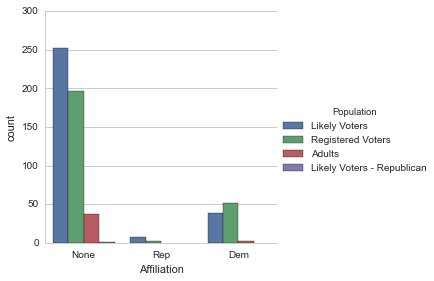

In [7]:
# Checking Affiliation of the polls conducted
#Population 4 categories
sns.factorplot('Affiliation',data=poll_df,kind='count', hue = 'Population')
#CONCLUSION: As likely voters and registered voters are high,
#the poll data should be a fair representation of the populations polled.

In [8]:
poll_df.head(2)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None


In [ ]:
#Average for Obama, Romney and Undecided voters

#Calculating mean
avg = DataFrame(poll_df.mean()) #calculates mean on columns that
                                #can have a mean calculated for.
avg.drop('Number of Observations', axis = 0, inplace = True)

#Calculating SD
std = DataFrame(poll_df.std())
std.drop('Number of Observations',axis = 0,inplace = True)

# Using pandas "plot" with kind="bar" and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

#CONCLUSION: Results are pretty close, and as the undecided voters are small,
#this race seems to be a tight one

In [ ]:
# put avg and std together
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg


In [ ]:
#To know where the undecided voters might have voted
# taking a look at voter sentiment and poll end dates

In [ ]:
#Plot of sentiment in the polls over time
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='<',
             linestyle='',figsize=(10,4))
#Conclusion: towards the end of the poll information, obama and romney have 
#equal stake at winning the election

In [ ]:
#importing datetime
from datetime import datetime
#Adding a new column which is difference in poll favor in %
poll_df['Difference']= (poll_df.Obama - poll_df.Romney)/100

In [ ]:
#as_index=Flase to keep the 0,1,2,... index. 
#Then we'll take the mean of the polls on that day.
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()

#plotting difference means of polls groupedby same start date
poll_df.plot(x='Start Date',y='Difference',marker='D',linestyle='-',figsize=(10,4))

#CONCLUSION: romney on two specific dates, he had major advantage in poles
#towards the end the race was getting a close

In [ ]:
#Checking to see if debates effected the polls
#debate dates, oct3rd, oct 11 and oct22nd of 2012. 
#Plotting lines as markers and zoom into month of october
#Due to the string-formatted date, a loop is used to cycle 
#the column and look for 2012-10

row_in = 0
xlimit =[]

for data in poll_df['Start Date']:
    if data[0:7]=='2012-10':
        xlimit.append(row_in)
    row_in += 1
    
#printing the row limits for month of october
print min(xlimit)
print max(xlimit)

In [ ]:
#plotting original data+markers
poll_df.plot(x='Start Date',y='Difference',marker='D',xlim=(329,356),
             linestyle='-',figsize=(10,4))

#first debate oct3rd, looking at polls on oct4th, row id=331
plt.axvline(x=331,linewidth=4,color='red')
#second debate oct16th, looking at polls on oct17th, row id=343
plt.axvline(x=343,linewidth=4,color='red')
#third debate oct22nd, looking at polls on oct23rd, row id=347
plt.axvline(x=347,linewidth=4,color='red')

#CONCLUSION: first debate obama favorable, second debate romney favorable
#third debate is neutral

# DONOR DATA SET

Analyzing the donations to the federal campaign.

Location: https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0

(150MB)

Questions:

1) How much donated, average donation?

2) Difference in donation between candidates

3) Donations differ from democrats to republicans

4) Donor Demography

5) Patterns in donation amounts?



In [ ]:
#Read csv file into a dataframe
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.info()
donor_df.head()

In [ ]:
donor_df['contb_receipt_amt'].value_counts()

In [ ]:
#average donation and variation
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print "Average donation %.2f with a SD of %.2f" %(don_mean,don_std)
#huge SD

In [ ]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()
top_donor
# negative values are refunds or are not part of donations.

In [ ]:
top_donor = top_donor[top_donor>0]
#removing refunds/negative values

In [ ]:
top_donor.sort_values(inplace=True)
top_donor.value_counts().head(10)
#counting the top donations
#conclusion: seems like top donations are between 10-2500
#Also integer value donations are popular

In [ ]:
# seeing the most(more than 10000 in count) contributed amounts (<2500)
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=200,figsize=(10,4))


In [ ]:
#Separating donations by Party.
#Creating a new column called "Party" 
#Extracting candidates and affilations

#Grabbing unique objects from the candidate column
candidates = donor_df.cand_nm.unique()
candidates

In [ ]:
# Adding Dictionary of party affiliation, apart from obama, rest are Reps
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df['Party'] = donor_df.cand_nm.map(party_map)
donor_df.head()

In [ ]:
#removing refunds
donor_df = donor_df[donor_df.contb_receipt_amt>0]
donor_df.info()
#total rows reduced


In [ ]:
#grouping by candidate names and counting the number of donations
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
#obama being onlt dem candidate, has max donations

In [ ]:
#total amount received
cand_sum=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

'''
#indexing from 0 in groupby object
i=0
for cand in cand_sum:
    print "The candidate %s raised $%0.f\n " %(cand_sum.index[i],cand)
    i += 1
'''

In [ ]:
#Plotting total donations
cand_sum.plot(kind='bar')
#obama has more donations as he enjoys being a single rep for DEMS

In [ ]:
#grouping party wise and summing donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
#Conclusion OBAMA couldn't beat the total donations by REPS

In [ ]:
#What is the occupation of donors?
#Defining a occupation DF that extracts contributor occupation
#and use pivot table to make the index=ocupations, columns=DEMS,REPS
#aggregate the sum of all contributions by each occupation

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                     index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')
occupation_df.head()


In [ ]:
occupation_df.shape
#lot of varied occupations

In [ ]:
#reducing the occupations by setting a limit for total contribution
#from an occupation as 1 million dollars
#adding column wise axis=1
occupation_df = occupation_df[occupation_df.sum(axis=1)>1000000]
occupation_df.shape
#reduced to 31 occupation

In [ ]:
#plotting the million dollar donation occupations
occupation_df.plot(kind='barh',figsize=(10,10))

In [ ]:
#dropping missing info occupations, combining CEO and C.E.O
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

In [ ]:
occupation_df.plot(kind='barh',figsize=(10,10))

In [ ]:
#CONCLUSION:
#Retirees are major contributors, DEM supporters
#CEOs are REP oriented, tax cuts by DEM ar emore aggressive for big companies
#Homemakers are more REP oriented
#Intellectual fields such as teachers, writers, professors, lawyers/attorneys are 
#DEM oriented